In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
class FTdiffusion:
    def __init__(self, K, T0, x0, x1, t0, t1, dx, dt, tp):
        self.T0 = T0
        self.x0 = x0  
        self.x1 = x1 
        self.t0 = t0
        self.t1 = t1
        self.dx = dx
        self.dt = dt
        self.tp = tp
        self.nx = round((x1 - x0) / dx) + 1
        self.x = np.linspace(x0, x1, self.nx)
        self.phi = np.array([self.phi0(xi) for xi in self.x])
        self.mult = K*dt/(dx**2)

    def phi0(self, x):
        if x >=0 and x <= 0.5:
            return self.T0 + 20*x + np.sin(50*np.pi*x)
        elif x > 0.5 and x <= 1:
            return self.T0 + 20 - 20*x + np.sin(50*np.pi*x)
        else:
            return self.T0

    def fds(self, phi_now):
        phi_now[0] = self.T0
        phi_now[-1] = self.T0
        phi_now[1:-1] = phi_now[1:-1] + self.mult *(phi_now[2:] - 2.0 * phi_now[1:-1] + phi_now[:-2])
        return phi_now


    def plot(self):
        t = self.t0
        plt.plot(self.x, self.phi, label=f'$\phi$({int(t)} s)')
        while t < self.t1:
            phi_new = self.fds(self.phi)
            self.phi[:] = phi_new
            t += self.dt

            if np.mod(t, self.tp) < self.dt:
                plt.plot(self.x, self.phi, label=f'$\phi$({int(t)} s)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.suptitle(r'Forward Difference scheme $\frac{\partial \phi}{\partial t} = -u \frac{\partial \phi}{\partial x}$', fontsize=14)
        plt.legend()
        plt.show()

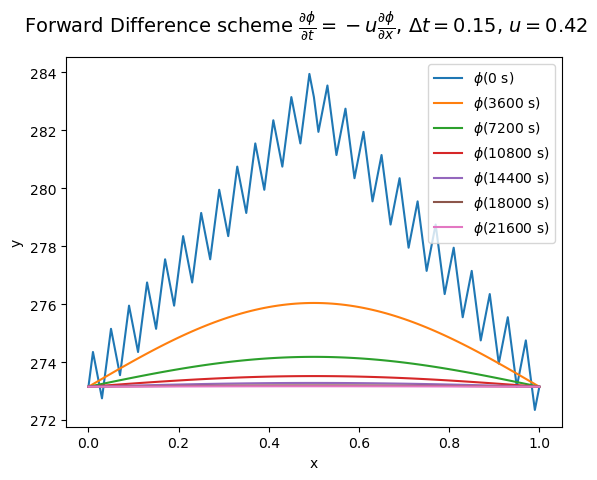

In [42]:
#Define parameters
K = 0.000029
T0 = 273.15
x0 = 0.0
x1 = 1.0
t0 = 0.0
t1 = 6*60*60
dt = 1.5
dx = 0.01
tp = 60*60

FTdiffusion(K, T0, x0, x1, t0, t1, dx, dt, tp).plot()